In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("./../../Dataset/data-week-2/lang_iden_combined.csv")

In [23]:
df.drop(columns = ["Unnamed: 0"], axis = 1, inplace = True)

In [24]:
# Encoding the langauge label for training 
from sklearn.preprocessing import LabelEncoder   # Class for labeling the data

encoder = LabelEncoder()
df["language_id"] = encoder.fit_transform(df["lang"])


In [25]:
# Train Test Split
X = df["text"]
Y = df["language_id"]


In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 42)

In [27]:
# Importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train)

In [28]:
from sklearn.neighbors import KNeighborsClassifier  # K neighbours class importing to build model

In [29]:
# vectorize test data
x_test = vectorizer.transform(x_test)

In [39]:
knn_model = KNeighborsClassifier()

In [40]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [41]:
import seaborn as sns
from  sklearn.metrics import confusion_matrix

def eval_confusion_matrix(model, x, y):
    ''' 
    Function for confusion matrix
    '''  
    y_pred = model.predict(x)
    print(confusion_matrix(y, y_pred))
    sns.heatmap(confusion_matrix(y, y_pred), annot = True, fmt = ".2f", cmap = "Blues", xticklabels = encoder.inverse_transform(y_test.unique()), yticklabels = encoder.inverse_transform(y_test.unique()), cbar = True)
    
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()  
    

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, x, y):
    '''
        Function to evaluate the model
    '''

    # Accuracy score
    y_pred = model.predict(x)
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Precision
    precision = precision_score(y, y_pred, average='weighted')
    print(f"Precision: {precision * 100:.2f}%")

    # Recall
    recall = recall_score(y, y_pred, average='weighted')
    print(f"Recall: {recall * 100:.2f}%")

    # F1-Score
    f1 = f1_score(y, y_pred, average='weighted')
    print(f"F1-Score: {f1 * 100:.2f}%")

Model analysis on test data
Accuracy: 45.50%
Precision: 75.53%
Recall: 45.50%
F1-Score: 41.66%
[[ 3 11  0  0 26]
 [ 0 30  0  0 10]
 [ 0  6 15  0 19]
 [ 0 12  0  9 19]
 [ 0  6  0  0 34]]


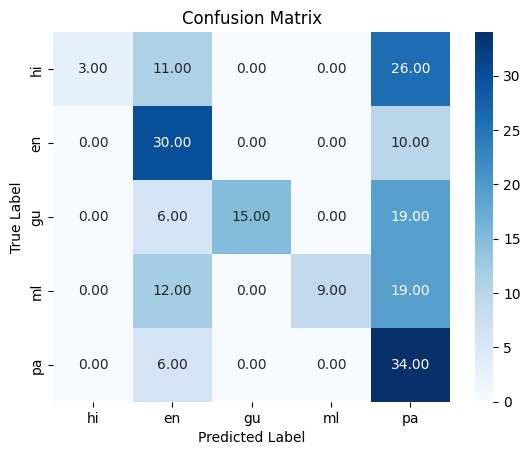

In [42]:
print("Model analysis on test data")
evaluate_model(knn_model, x_test, y_test)
eval_confusion_matrix(knn_model, x_test, y_test)

In [46]:
# Example new text to predict
new_text = ["My name is Laptop"]

# Vectorize the new text using the same vectorizer
new_text_vectorized = vectorizer.transform(new_text)

# Predict the class of the new text
predicted_class = knn_model.predict(new_text_vectorized)

# Output the predicted class (0 or 1)
print(f"Predicted class for the new text: {predicted_class[0]}")

decoded_label = encoder.inverse_transform([predicted_class[0]])
decoded_label

Predicted class for the new text: 4


array(['pa'], dtype=object)